In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
#upload google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df[5::6]
df.tail(30)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420371,30.12.2016 18:10:00,1008.92,0.38,272.84,-1.87,84.80,6.28,5.32,0.95,3.29,5.28,1282.34,0.35,1.00,145.1
420377,30.12.2016 19:10:00,1008.89,-0.78,271.69,-3.10,84.20,5.77,4.86,0.91,3.00,4.81,1287.98,0.82,1.24,168.2
420383,30.12.2016 20:10:00,1008.98,-1.87,270.60,-2.83,93.10,5.32,4.96,0.37,3.06,4.91,1293.20,0.85,2.04,176.6
420389,30.12.2016 21:10:00,1009.25,-2.08,270.37,-3.65,88.90,5.24,4.66,0.58,2.88,4.62,1294.70,0.36,0.84,198.5
420395,30.12.2016 22:10:00,1008.93,-2.85,269.62,-5.41,82.40,4.95,4.08,0.87,2.52,4.04,1298.27,1.18,1.84,199.4
420401,30.12.2016 23:10:00,1008.81,-3.33,269.15,-5.20,86.80,4.77,4.14,0.63,2.56,4.11,1300.41,0.93,1.48,213.5
420407,31.12.2016 00:10:00,1008.64,-4.17,268.33,-5.36,91.40,4.48,4.09,0.39,2.53,4.06,1304.27,0.92,1.88,176.3
420413,31.12.2016 01:10:00,1008.05,-4.26,268.28,-6.37,85.10,4.45,3.79,0.66,2.34,3.76,1304.09,0.55,1.04,258.7
420419,31.12.2016 02:10:00,1007.52,-5.05,267.54,-6.28,91.00,4.19,3.82,0.38,2.36,3.79,1307.20,0.61,1.34,108.9
420425,31.12.2016 03:10:00,1007.35,-4.67,267.93,-6.56,86.50,4.32,3.73,0.58,2.31,3.71,1305.16,0.49,1.20,309.5


In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Date Time'>

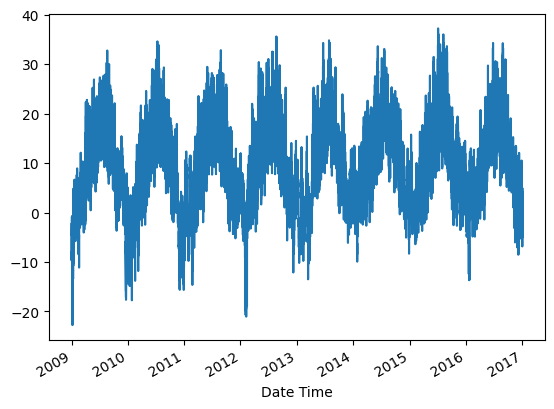

In [ ]:
temp = df['T (degC)']
temp.plot()

In [ ]:
df_as_np = df.to_numpy()
df_as_np

array([['01.01.2009 01:00:00', 996.5, -8.05, ..., 0.21, 0.63, 192.7],
       ['01.01.2009 02:00:00', 996.62, -8.88, ..., 0.25, 0.63, 190.3],
       ['01.01.2009 03:00:00', 996.84, -8.81, ..., 0.18, 0.63, 167.2],
       ...,
       ['31.12.2016 21:10:00', 1001.19, -2.75, ..., 0.71, 1.56, 158.7],
       ['31.12.2016 22:10:00', 1000.65, -2.89, ..., 0.35, 0.68, 216.7],
       ['31.12.2016 23:10:00', 1000.11, -3.93, ..., 0.56, 1.0, 202.6]],
      dtype=object)

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [ ]:
print(X)

[[[-8.05]
  [-8.88]
  [-8.81]
  [-9.05]
  [-9.63]]

 [[-8.88]
  [-8.81]
  [-9.05]
  [-9.63]
  [-9.67]]

 [[-8.81]
  [-9.05]
  [-9.63]
  [-9.67]
  [-9.17]]

 ...

 [[ 2.44]
  [ 1.29]
  [-0.42]
  [-0.98]
  [-1.4 ]]

 [[ 1.29]
  [-0.42]
  [-0.98]
  [-1.4 ]
  [-2.75]]

 [[-0.42]
  [-0.98]
  [-1.4 ]
  [-2.75]
  [-2.89]]]


In [ ]:
print(y)

[-9.67 -9.17 -8.1  ... -2.75 -2.89 -3.93]


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(128,activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_6 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
model.compile(optimizer='adam',loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1753/1753 [==============================] - 56s 30ms/step - loss: 5.8756 - root_mean_squared_error: 2.4240
Epoch 2/10
1753/1753 [==============================] - 48s 27ms/step - loss: 3.9687 - root_mean_squared_error: 1.9922
Epoch 3/10
1753/1753 [==============================] - 48s 27ms/step - loss: 3.6149 - root_mean_squared_error: 1.9013
Epoch 4/10
1753/1753 [==============================] - 48s 27ms/step - loss: 3.3150 - root_mean_squared_error: 1.8207
Epoch 5/10
1753/1753 [==============================] - 46s 26ms/step - loss: 3.2082 - root_mean_squared_error: 1.7911
Epoch 6/10
1753/1753 [==============================] - 46s 26ms/step - loss: 2.9312 - root_mean_squared_error: 1.7121
Epoch 7/10
1753/1753 [==============================] - 47s 27ms/step - loss: 2.8497 - root_mean_squared_error: 1.6881
Epoch 8/10
1753/1753 [==============================] - 46s 26ms/step - loss: 2.6740 - root_mean_squared_error: 1.6352
Epoch 9/10
1753/1753 [==========================

In [ ]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

439/439 [==============================] - 2s 3ms/step


,Test Predictions,Actuals
0,17.842684,18.62
1,4.250008,3.71
2,-0.748592,-0.56
3,9.373383,10.00
4,0.304220,0.14
...,...,...
14013,-2.920456,-3.02
14014,10.312077,11.44
14015,13.173630,15.21
14016,15.878645,18.21


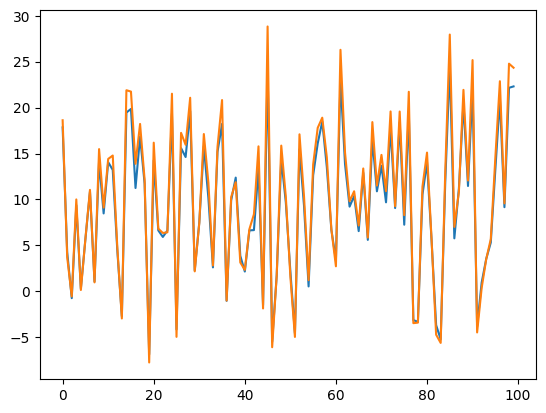

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])